In [1]:
!pip install neuralforecast datasets openmeteo-requests pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.2/263.2 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 683.2/683.2 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install neuralforecast openmeteo-requests requests-cache retry-requests pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 7.8 MB/s eta 0:00:00


In [3]:
import requests
import pandas as pd
import numpy as np

params_weather = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["pressure_msl", "wind_speed_10m", "wind_direction_10m"]
}
url_weather = "https://archive-api.open-meteo.com/v1/archive"
response_weather = requests.get(url_weather, params=params_weather).json()

df_weather = pd.DataFrame({
    'date': pd.to_datetime(response_weather['hourly']['time']),
    'pressure': response_weather['hourly']['pressure_msl'],
    'wind_speed': response_weather['hourly']['wind_speed_10m'],
    'wind_dir': response_weather['hourly']['wind_direction_10m']
})

df_weather['wind_sin'] = np.sin(np.deg2rad(df_weather['wind_dir']))
df_weather['wind_cos'] = np.cos(np.deg2rad(df_weather['wind_dir']))

params_marine = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["wave_height"]
}
url_marine = "https://marine-api.open-meteo.com/v1/marine"
response_marine = requests.get(url_marine, params=params_marine).json()

df_marine = pd.DataFrame({
    'date': pd.to_datetime(response_marine['hourly']['time']),
    'y': response_marine['hourly']['wave_height']
})

df = pd.merge(df_weather, df_marine, on="date")
df = df.rename(columns={'date': 'ds'})
df['unique_id'] = 'NorthSea_Point1'
df = df.dropna()

print("data processing completed successfully. Now we have wind vectors sin/cos")

data processing completed successfully. Now we have wind vectors sin/cos


# NHITS

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


training with huber loss best of both worlds


┏━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name         ┃ Type          ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ loss         │ HuberLoss     │      0 │ train │     0 │
│ 1 │ padder_train │ ConstantPad1d │      0 │ train │     0 │
│ 2 │ scaler       │ TemporalNorm  │      0 │ train │     0 │
│ 3 │ blocks       │ ModuleList    │  3.0 M │ train │     0 │
└───┴──────────────┴───────────────┴────────┴───────┴───────┘

Trainable params: 3.0 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 3.0 M                                                                                                
Total estimated model params size (MB): 12                                                                         
Modules in train mode: 34                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=4000` reached.


/usr/local/lib/python3.12/dist-packages/utilsforecast/processing.py:378: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.12/dist-packages/utilsforecast/processing.py:434: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

mae: 0.325 m


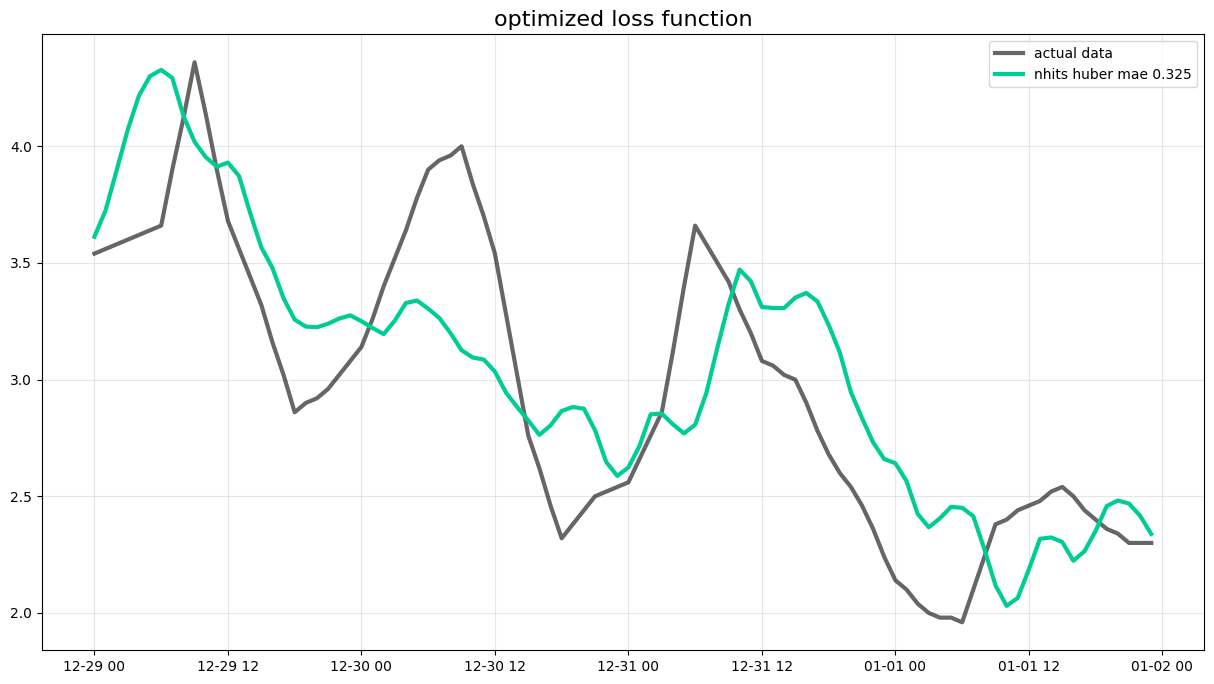

In [11]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NHITS
from neuralforecast.losses.pytorch import HuberLoss

url_weather = "https://archive-api.open-meteo.com/v1/archive"
params_weather = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["pressure_msl", "wind_speed_10m"]
}
resp_w = requests.get(url_weather, params=params_weather).json()
df_weather = pd.DataFrame({
    'ds': pd.to_datetime(resp_w['hourly']['time']),
    'pressure': resp_w['hourly']['pressure_msl'],
    'wind_speed': resp_w['hourly']['wind_speed_10m']
})

url_marine = "https://marine-api.open-meteo.com/v1/marine"
params_marine = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["wave_height"]
}
resp_m = requests.get(url_marine, params=params_marine).json()
df_marine = pd.DataFrame({
    'ds': pd.to_datetime(resp_m['hourly']['time']),
    'y': resp_m['hourly']['wave_height']
})

df = pd.merge(df_weather, df_marine, on="ds")
df['unique_id'] = 'NorthSea_Point1'

df['wind_rolling'] = df['wind_speed'].rolling(window=3).mean().fillna(df['wind_speed'])
df = df.dropna()
horizon = 96
Y_train = df[:-horizon]
Y_test = df[-horizon:]
input_size = 48
models = [
    NHITS(h=horizon,
          input_size=input_size,
          loss=HuberLoss(),
          futr_exog_list=['pressure', 'wind_speed', 'wind_rolling'],
          max_steps=4000,
          scaler_type='robust',
          alias='NHITS_Huber')
]

nf = NeuralForecast(models=models, freq='H')
nf.fit(df=Y_train)
future_exog = Y_test[['unique_id', 'ds', 'pressure', 'wind_speed', 'wind_rolling']]
Y_hat = nf.predict(futr_df=future_exog)
final_df = pd.merge(Y_test, Y_hat, on=['ds', 'unique_id'], how='left')
mae_huber = abs(final_df['y'] - final_df['NHITS_Huber']).mean()
print(f"mae: {mae_huber:.3f} m")
plt.figure(figsize=(15, 8))
plt.plot(final_df['ds'], final_df['y'], label='actual data', color='black', linewidth=3, alpha=0.6)
plt.plot(final_df['ds'], final_df['NHITS_Huber'], label=f'nhits huber mae {mae_huber:.3f}', color='#00CC96', linewidth=3)
plt.title('optimized loss function', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

restoring reliable base settings


INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name         ┃ Type          ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ loss         │ MAE           │      0 │ train │     0 │
│ 1 │ padder_train │ ConstantPad1d │      0 │ train │     0 │
│ 2 │ scaler       │ TemporalNorm  │      0 │ train │     0 │
│ 3 │ blocks       │ ModuleList    │  2.9 M │ train │     0 │
└───┴──────────────┴───────────────┴────────┴───────┴───────┘

Trainable params: 2.9 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 2.9 M                                                                                                
Total estimated model params size (MB): 11                                                                         
Modules in train mode: 34                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=2000` reached.


/usr/local/lib/python3.12/dist-packages/utilsforecast/processing.py:378: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.12/dist-packages/utilsforecast/processing.py:434: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

mae : 0.377 m


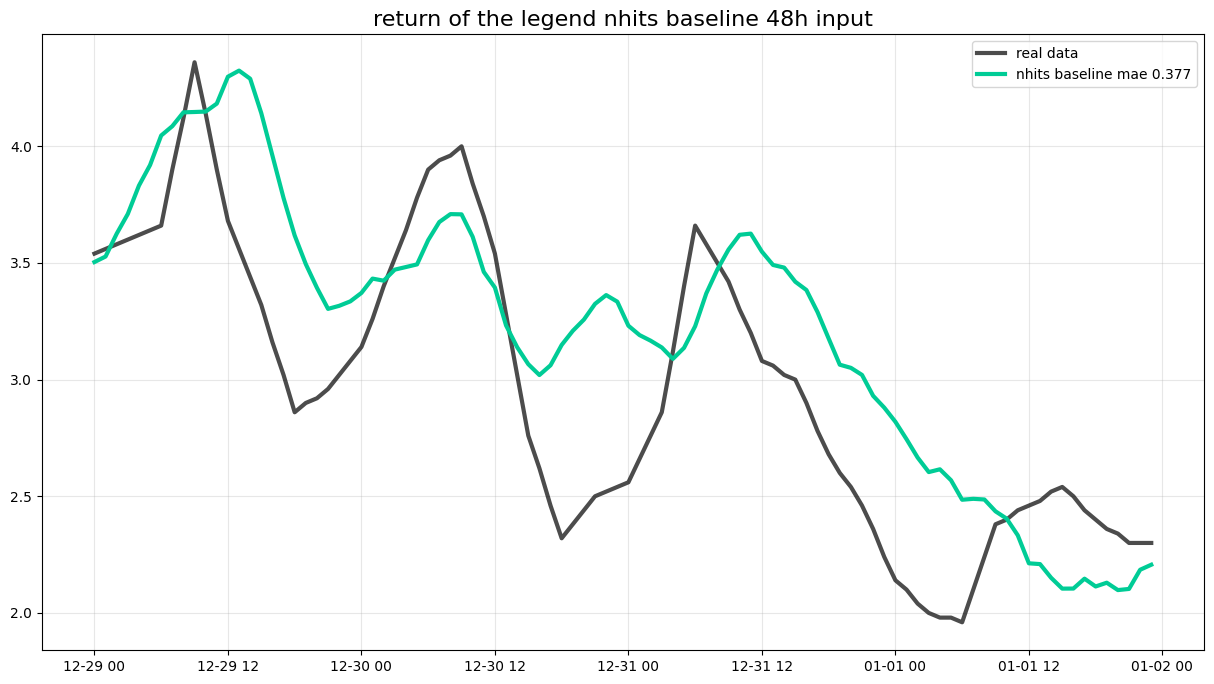

In [12]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NHITS
from neuralforecast.losses.pytorch import MAE

print("restoring reliable base settings")

url_weather = "https://archive-api.open-meteo.com/v1/archive"
params_weather = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["pressure_msl", "wind_speed_10m"]
}
resp_w = requests.get(url_weather, params=params_weather).json()
df_weather = pd.DataFrame({
    'ds': pd.to_datetime(resp_w['hourly']['time']),
    'pressure': resp_w['hourly']['pressure_msl'],
    'wind_speed': resp_w['hourly']['wind_speed_10m']
})

url_marine = "https://marine-api.open-meteo.com/v1/marine"
params_marine = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["wave_height"]
}
resp_m = requests.get(url_marine, params=params_marine).json()
df_marine = pd.DataFrame({
    'ds': pd.to_datetime(resp_m['hourly']['time']),
    'y': resp_m['hourly']['wave_height']
})

df = pd.merge(df_weather, df_marine, on="ds")
df['unique_id'] = 'NorthSea_Point1'
df = df.dropna()

horizon = 96
Y_train = df[:-horizon]
Y_test = df[-horizon:]

models = [
    NHITS(h=horizon,
          input_size=48,
          loss=MAE(),
          futr_exog_list=['pressure', 'wind_speed'],
          max_steps=2000,
          scaler_type='robust',
          random_seed=42,
          alias='NHITS_Baseline')
]

nf = NeuralForecast(models=models, freq='H')
nf.fit(df=Y_train)
future_exog = Y_test[['unique_id', 'ds', 'pressure', 'wind_speed']]
Y_hat = nf.predict(futr_df=future_exog)
final_df = pd.merge(Y_test, Y_hat, on=['ds', 'unique_id'], how='left')
mae_final = abs(final_df['y'] - final_df['NHITS_Baseline']).mean()
print(f"mae : {mae_final:.3f} m")
plt.figure(figsize=(15, 8))
plt.plot(final_df['ds'], final_df['y'], label='real data', color='black', linewidth=3, alpha=0.7)
plt.plot(final_df['ds'], final_df['NHITS_Baseline'], label=f'nhits baseline mae {mae_final:.3f}', color='#00CC96', linewidth=3)
plt.title('return of the legend nhits baseline 48h input', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Ми використали тут ансамбль, щоб аби зменшити "випадковість" нейронки, і додали змінну кінетичної енергії вітру, аби стабілізувати прогноз

experiment physics 2 bagging 3 models


INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:lightning_fabric.utilities.seed:Seed set to 999
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


training 3 parallel models for stability


┏━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name         ┃ Type          ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ loss         │ MAE           │      0 │ train │     0 │
│ 1 │ padder_train │ ConstantPad1d │      0 │ train │     0 │
│ 2 │ scaler       │ TemporalNorm  │      0 │ train │     0 │
│ 3 │ blocks       │ ModuleList    │  3.0 M │ train │     0 │
└───┴──────────────┴───────────────┴────────┴───────┴───────┘

Trainable params: 3.0 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 3.0 M                                                                                                
Total estimated model params size (MB): 12                                                                         
Modules in train mode: 34                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=2000` reached.


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name         ┃ Type          ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ loss         │ MAE           │      0 │ train │     0 │
│ 1 │ padder_train │ ConstantPad1d │      0 │ train │     0 │
│ 2 │ scaler       │ TemporalNorm  │      0 │ train │     0 │
│ 3 │ blocks       │ ModuleList    │  3.0 M │ train │     0 │
└───┴──────────────┴───────────────┴────────┴───────┴───────┘

Trainable params: 3.0 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 3.0 M                                                                                                
Total estimated model params size (MB): 12                                                                         
Modules in train mode: 34                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=2000` reached.


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name         ┃ Type          ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ loss         │ MAE           │      0 │ train │     0 │
│ 1 │ padder_train │ ConstantPad1d │      0 │ train │     0 │
│ 2 │ scaler       │ TemporalNorm  │      0 │ train │     0 │
│ 3 │ blocks       │ ModuleList    │  3.0 M │ train │     0 │
└───┴──────────────┴───────────────┴────────┴───────┴───────┘

Trainable params: 3.0 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 3.0 M                                                                                                
Total estimated model params size (MB): 12                                                                         
Modules in train mode: 34                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=2000` reached.


/usr/local/lib/python3.12/dist-packages/utilsforecast/processing.py:378: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.12/dist-packages/utilsforecast/processing.py:434: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

mae physics bagging: 0.334 m


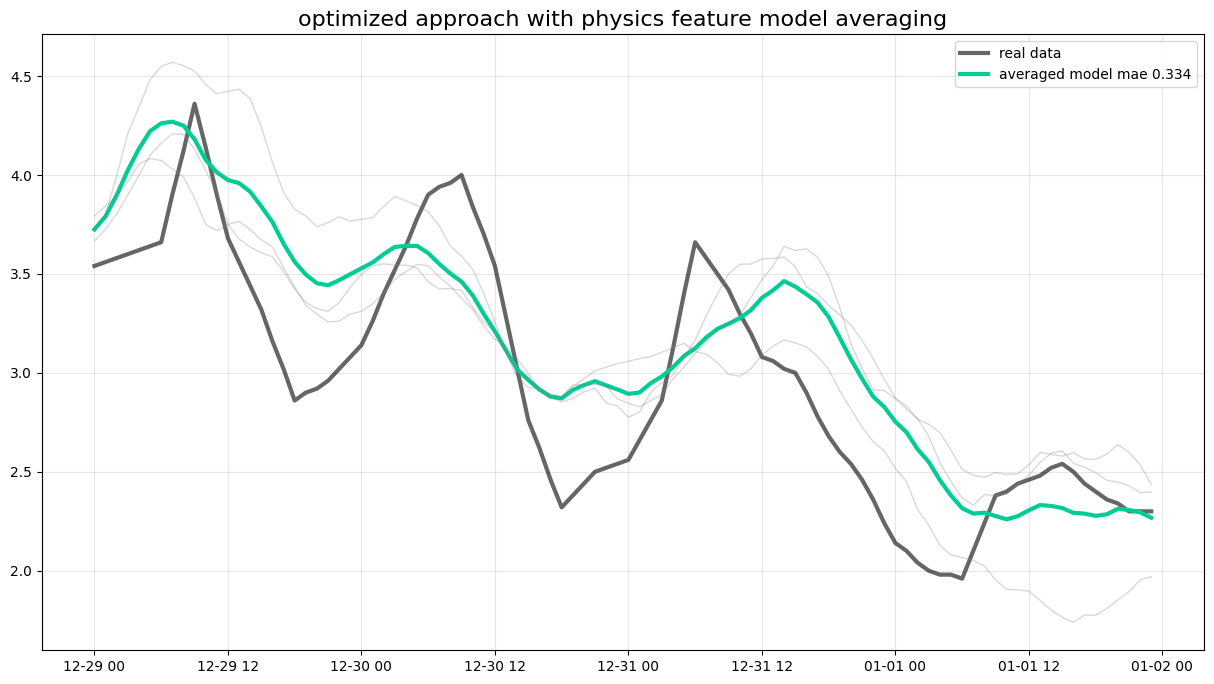

In [13]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NHITS
from neuralforecast.losses.pytorch import MAE

print("experiment physics 2 bagging 3 models")

url_weather = "https://archive-api.open-meteo.com/v1/archive"
params_weather = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["pressure_msl", "wind_speed_10m"]
}
resp_w = requests.get(url_weather, params=params_weather).json()
df_weather = pd.DataFrame({
    'ds': pd.to_datetime(resp_w['hourly']['time']),
    'pressure': resp_w['hourly']['pressure_msl'],
    'wind_speed': resp_w['hourly']['wind_speed_10m']
})
df_weather['wind_energy'] = df_weather['wind_speed'] ** 2
url_marine = "https://marine-api.open-meteo.com/v1/marine"
params_marine = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["wave_height"]
}
resp_m = requests.get(url_marine, params=params_marine).json()
df_marine = pd.DataFrame({
    'ds': pd.to_datetime(resp_m['hourly']['time']),
    'y': resp_m['hourly']['wave_height']
})
df = pd.merge(df_weather, df_marine, on="ds")
df['unique_id'] = 'NorthSea_Point1'
df = df.dropna()

horizon = 96
y_train = df[:-horizon]
y_test = df[-horizon:]

models = [
    NHITS(h=horizon,
          input_size=48,
          loss=MAE(),
          futr_exog_list=['pressure', 'wind_speed', 'wind_energy'],
          max_steps=2000,
          scaler_type='robust',
          random_seed=1,
          alias='NHITS_1'),

    NHITS(h=horizon,
          input_size=48,
          loss=MAE(),
          futr_exog_list=['pressure', 'wind_speed', 'wind_energy'],
          max_steps=2000,
          scaler_type='robust',
          random_seed=42,
          alias='NHITS_2'),

    NHITS(h=horizon,
          input_size=48,
          loss=MAE(),
          futr_exog_list=['pressure', 'wind_speed', 'wind_energy'],
          max_steps=2000,
          scaler_type='robust',
          random_seed=999,
          alias='NHITS_3')
]

print("training 3 parallel models for stability")
nf = NeuralForecast(models=models, freq='H')
nf.fit(df=y_train)
future_exog = y_test[['unique_id', 'ds', 'pressure', 'wind_speed', 'wind_energy']]
y_hat = nf.predict(futr_df=future_exog)
y_hat['ensemble_avg'] = (y_hat['NHITS_1'] + y_hat['NHITS_2'] + y_hat['NHITS_3']) / 3
final_df = pd.merge(y_test, y_hat, on=['ds', 'unique_id'], how='left')
mae_bagging = abs(final_df['y'] - final_df['ensemble_avg']).mean()
print(f"mae physics bagging: {mae_bagging:.3f} m")
plt.figure(figsize=(15, 8))
plt.plot(final_df['ds'], final_df['y'], label='real data', color='black', linewidth=3, alpha=0.6)
plt.plot(final_df['ds'], final_df['ensemble_avg'], label=f'averaged model mae {mae_bagging:.3f}', color='#00CC96', linewidth=3)
plt.plot(final_df['ds'], final_df['NHITS_1'], color='gray', alpha=0.3, linewidth=1)
plt.plot(final_df['ds'], final_df['NHITS_2'], color='gray', alpha=0.3, linewidth=1)
plt.plot(final_df['ds'], final_df['NHITS_3'], color='gray', alpha=0.3, linewidth=1)
plt.title('optimized approach with physics feature model averaging', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Тут ми спробуємо прибрати шум, згладити хвилі, прибрати випадковий шум з датчиків. window=3 означає, що ми беремо середнє за 3 години і це мало би зробити графік більш плавним


final experiment target smoothing noise reduction


INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name         ┃ Type          ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ loss         │ MAE           │      0 │ train │     0 │
│ 1 │ padder_train │ ConstantPad1d │      0 │ train │     0 │
│ 2 │ scaler       │ TemporalNorm  │      0 │ train │     0 │
│ 3 │ blocks       │ ModuleList    │  2.9 M │ train │     0 │
└───┴──────────────┴───────────────┴────────┴───────┴───────┘

Trainable params: 2.9 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 2.9 M                                                                                                
Total estimated model params size (MB): 11                                                                         
Modules in train mode: 34                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=2000` reached.


/usr/local/lib/python3.12/dist-packages/utilsforecast/processing.py:378: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.12/dist-packages/utilsforecast/processing.py:434: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

mae smoothed target: 0.327 m


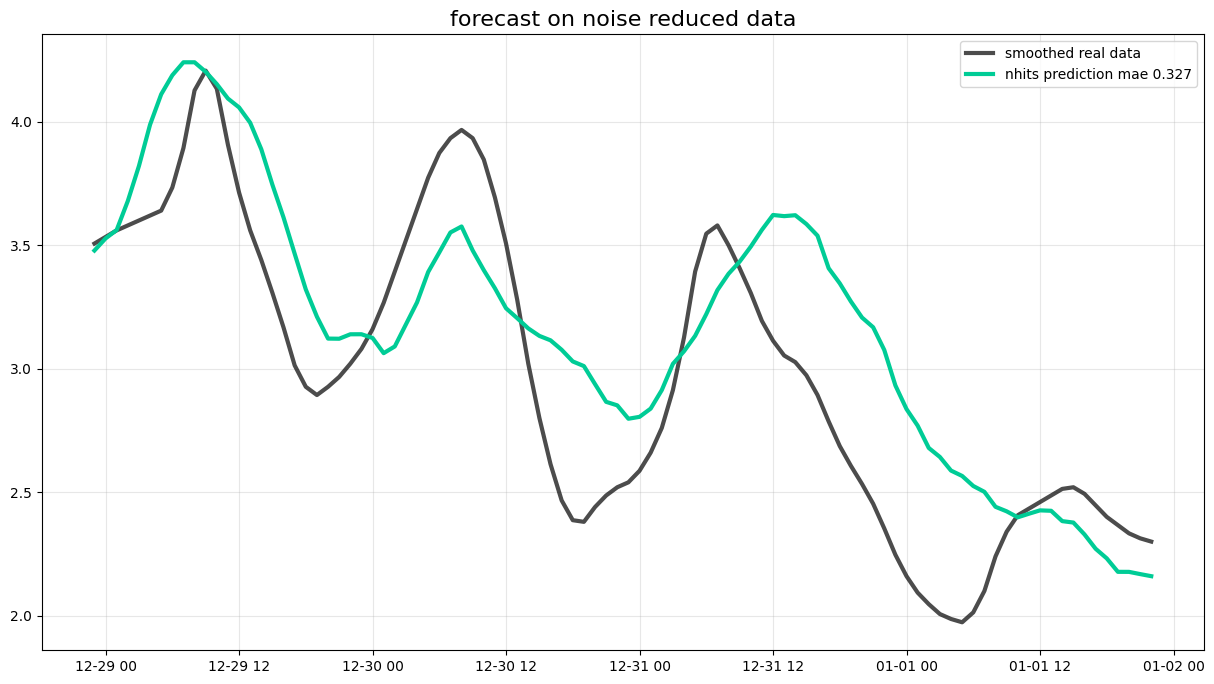

In [15]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NHITS
from neuralforecast.losses.pytorch import MAE

print("final experiment target smoothing noise reduction")

url_weather = "https://archive-api.open-meteo.com/v1/archive"
params_weather = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["pressure_msl", "wind_speed_10m"]
}
resp_w = requests.get(url_weather, params=params_weather).json()
df_weather = pd.DataFrame({
    'ds': pd.to_datetime(resp_w['hourly']['time']),
    'pressure': resp_w['hourly']['pressure_msl'],
    'wind_speed': resp_w['hourly']['wind_speed_10m']
})

url_marine = "https://marine-api.open-meteo.com/v1/marine"
params_marine = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["wave_height"]
}
resp_m = requests.get(url_marine, params=params_marine).json()
df_marine = pd.DataFrame({
    'ds': pd.to_datetime(resp_m['hourly']['time']),
    'y': resp_m['hourly']['wave_height']
})
df = pd.merge(df_weather, df_marine, on="ds")
df['unique_id'] = 'NorthSea_Point1'
df['y'] = df['y'].rolling(window=3, center=True).mean()
df = df.dropna()
horizon = 96
y_train = df[:-horizon]
y_test = df[-horizon:]

models = [
    NHITS(h=horizon,
          input_size=48,
          loss=MAE(),
          futr_exog_list=['pressure', 'wind_speed'],
          max_steps=2000,
          scaler_type='robust',
          random_seed=42,
          alias='nhits_smooth')
]

nf = NeuralForecast(models=models, freq='H')
nf.fit(df=y_train)
future_exog = y_test[['unique_id', 'ds', 'pressure', 'wind_speed']]
y_hat = nf.predict(futr_df=future_exog)
final_df = pd.merge(y_test, y_hat, on=['ds', 'unique_id'], how='left')
mae_smooth = abs(final_df['y'] - final_df['nhits_smooth']).mean()
print(f"mae smoothed target: {mae_smooth:.3f} m")
plt.figure(figsize=(15, 8))
plt.plot(final_df['ds'], final_df['y'], label='smoothed real data', color='black', linewidth=3, alpha=0.7)
plt.plot(final_df['ds'], final_df['nhits_smooth'], label=f'nhits prediction mae {mae_smooth:.3f}', color='#00CC96', linewidth=3)
plt.title('forecast on noise reduced data', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Тут ми фактично створюємо пам'ять про вітер для моделі вручну. Ми по факту надаємо дані про вітер зараз, і вітер, що був 3, 6, 12 годин тому. Далі пробуємо предбачити, що буде з хвилями. Колонку з минулими хвилями ми не даємо моделі в цьому експерименті

experiment honest physics forecast only weather no peeking into past
mae physics only model 0.332 m


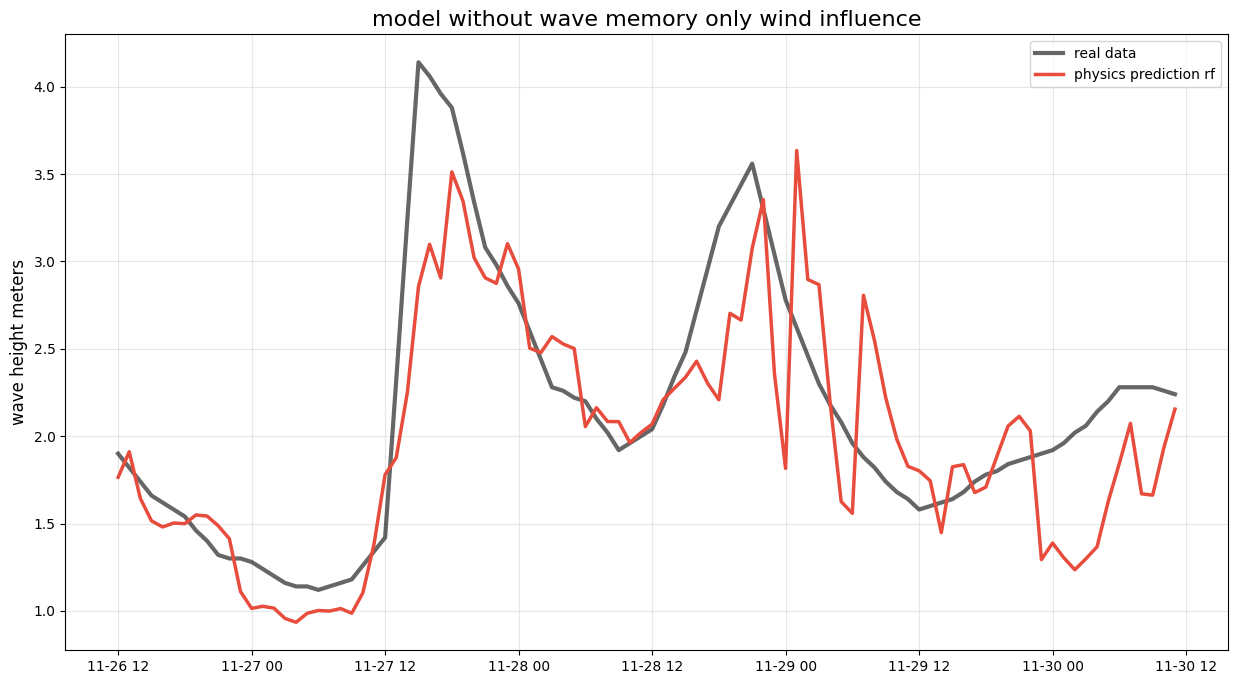

In [17]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

url_weather = "https://archive-api.open-meteo.com/v1/archive"
params_weather = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["pressure_msl", "wind_speed_10m"]
}
df_weather = pd.DataFrame(requests.get(url_weather, params=params_weather).json()['hourly'])
df_weather['time'] = pd.to_datetime(df_weather['time'])

url_marine = "https://marine-api.open-meteo.com/v1/marine"
params_marine = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["wave_height"]
}
df_marine = pd.DataFrame(requests.get(url_marine, params=params_marine).json()['hourly'])
df_marine['time'] = pd.to_datetime(df_marine['time'])

df = pd.merge(df_weather, df_marine, on='time')
df = df.rename(columns={'pressure_msl': 'pressure', 'wind_speed_10m': 'wind', 'wave_height': 'y'})

for lag in [1, 3, 6, 12, 24]:
    df[f'wind_lag_{lag}'] = df['wind'].shift(lag)
    df[f'pressure_lag_{lag}'] = df['pressure'].shift(lag)

df['wind_energy'] = df['wind'] ** 2

df = df.dropna()

split_point = int(len(df) * 0.9)

train = df.iloc[:split_point]
test = df.iloc[split_point:]

features = [col for col in df.columns if 'lag' in col or col in ['wind', 'pressure', 'wind_energy']]
target = 'y'

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]
rf = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
mae_rf = mean_absolute_error(y_test, predictions)
print(f"mae physics only model {mae_rf:.3f} m")

zoom_slice = slice(0, 96)
dates_zoom = test['time'].iloc[zoom_slice]
y_real_zoom = y_test.iloc[zoom_slice]
y_pred_zoom = predictions[zoom_slice]

plt.figure(figsize=(15, 8))
plt.plot(dates_zoom, y_real_zoom, label='real data', color='black', linewidth=3, alpha=0.6)
plt.plot(dates_zoom, y_pred_zoom, label='physics prediction rf', color='#e74c3c', linewidth=2.5)
plt.title('model without wave memory only wind influence', fontsize=16)
plt.ylabel('wave height meters', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Тут візуалізація того, скільки часу у нас є в запасі

launching early warning system visualization of time reserve


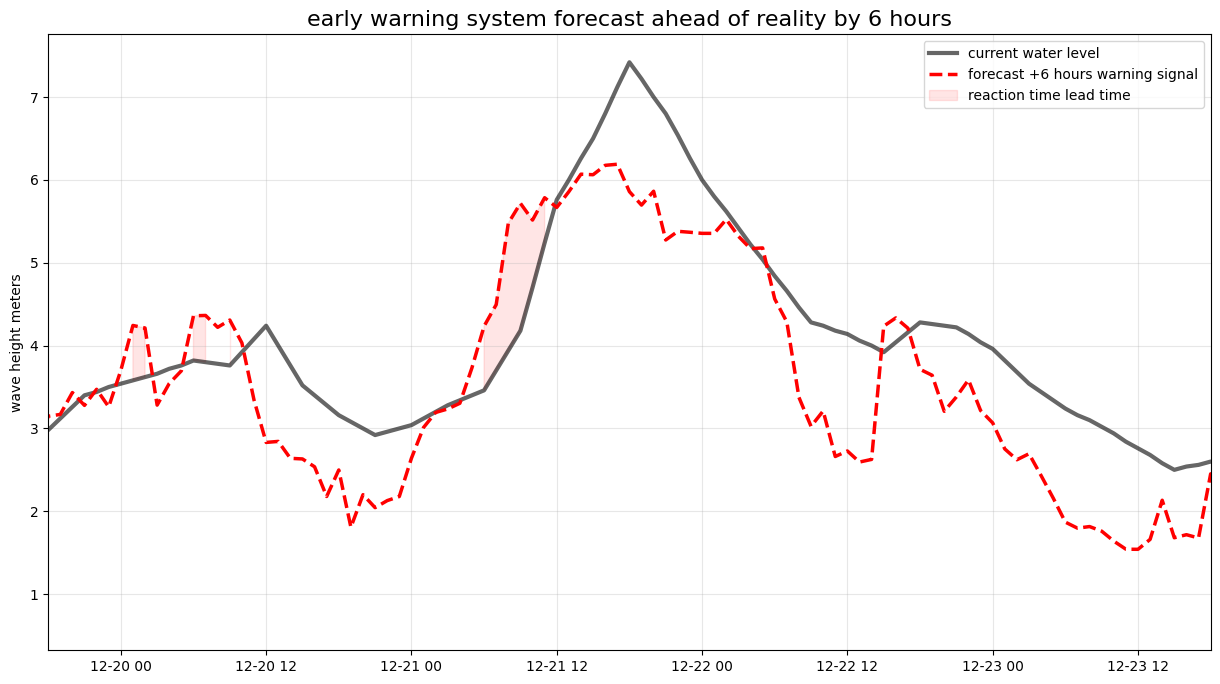

In [19]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

url_weather = "https://archive-api.open-meteo.com/v1/archive"
params_weather = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["pressure_msl", "wind_speed_10m"]
}
resp_w = requests.get(url_weather, params=params_weather).json()
df_weather = pd.DataFrame({
    'ds': pd.to_datetime(resp_w['hourly']['time']),
    'pressure': resp_w['hourly']['pressure_msl'],
    'wind': resp_w['hourly']['wind_speed_10m']
})

url_marine = "https://marine-api.open-meteo.com/v1/marine"
params_marine = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["wave_height"]
}
resp_m = requests.get(url_marine, params=params_marine).json()
df_marine = pd.DataFrame({
    'ds': pd.to_datetime(resp_m['hourly']['time']),
    'y': resp_m['hourly']['wave_height']
})

df = pd.merge(df_weather, df_marine, on="ds")

df['pressure_drop'] = df['pressure'].diff(3).fillna(0) * -1
df['wind_energy'] = df['wind'] ** 2
df['wind_rolling'] = df['wind'].rolling(6).mean().fillna(0)
lead_time = 6
df['y_target_future'] = df['y'].shift(-lead_time)
df = df.dropna()
split = int(len(df) * 0.9)
train = df.iloc[:split]
test = df.iloc[split:]

features = ['pressure', 'pressure_drop', 'wind', 'wind_energy', 'wind_rolling']
model = GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.05, random_state=42)
model.fit(train[features], train['y_target_future'])
pred_future = model.predict(test[features])
plot_df = pd.DataFrame({
    'ds': test['ds'],
    'current_water': test['y'],
    'warning_signal': pred_future
})

plt.figure(figsize=(15, 8))
plt.plot(plot_df['ds'], plot_df['current_water'], label='current water level', color='black', linewidth=3, alpha=0.6)

plt.plot(plot_df['ds'], plot_df['warning_signal'], label=f'forecast +{lead_time} hours warning signal',
         color='#ff0000', linewidth=2.5, linestyle='--')

plt.fill_between(plot_df['ds'], plot_df['current_water'], plot_df['warning_signal'],
                 where=(plot_df['warning_signal'] > plot_df['current_water'] + 0.5),
                 color='red', alpha=0.1, label='reaction time lead time')
plt.title(f'early warning system forecast ahead of reality by {lead_time} hours', fontsize=16)
plt.ylabel('wave height meters')
plt.legend()
plt.grid(True, alpha=0.3)
peak_idx = plot_df['current_water'].idxmax()
zoom_start = plot_df.loc[peak_idx, 'ds'] - pd.Timedelta(days=2)
zoom_end = plot_df.loc[peak_idx, 'ds'] + pd.Timedelta(days=2)
plt.xlim(zoom_start, zoom_end)
plt.show()

# LightGBM

In [20]:
!pip install mlforecast lightgbm xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 6.6 MB/s eta 0:00:00


launching gradient boosting lightgbm fixed version
training trees


/usr/local/lib/python3.12/dist-packages/utilsforecast/processing.py:378: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.12/dist-packages/utilsforecast/processing.py:378: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.12/dist-packages/utilsforecast/processing.py:378: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.12/dist-packages/utilsforecast/processing.py:378: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.12/dist-packages/utilsforecast/processing.py:378: FutureWarning: 'H' is deprecated and will be remove

mae lightgbm 0.421 m


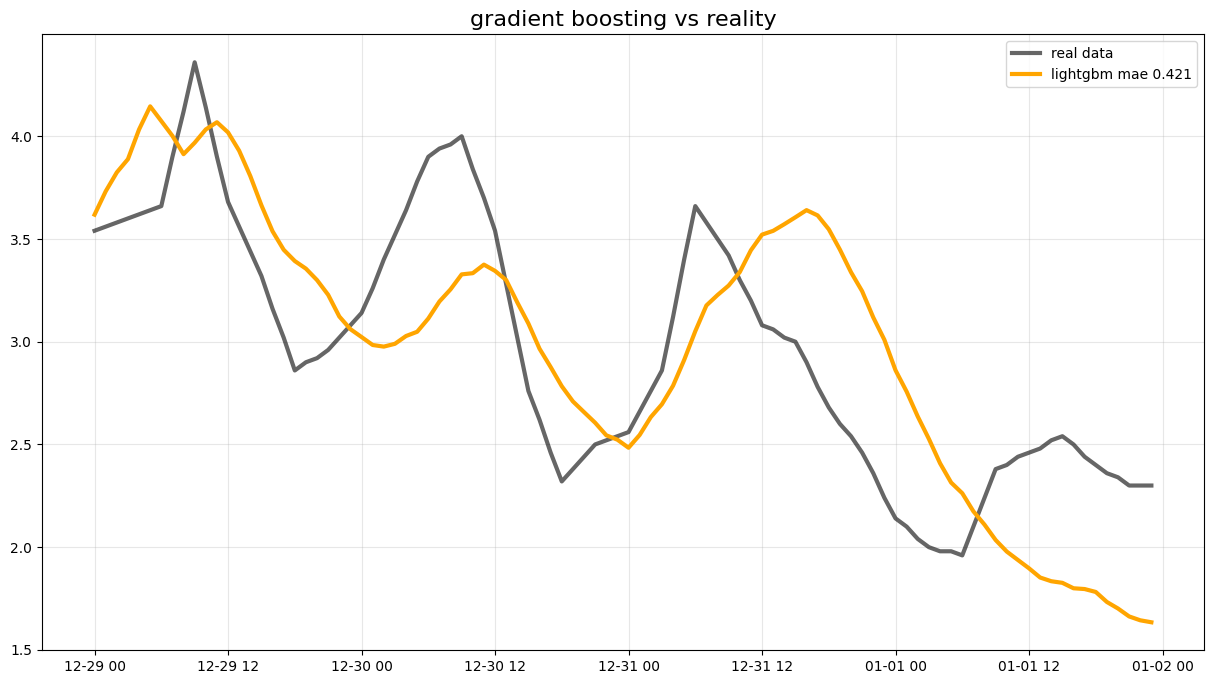

In [22]:
!pip install mlforecast lightgbm xgboost

import requests
import pandas as pd
import matplotlib.pyplot as plt
from mlforecast import MLForecast
from mlforecast.lag_transforms import RollingMean
from lightgbm import LGBMRegressor

print("launching gradient boosting lightgbm fixed version")

url_weather = "https://archive-api.open-meteo.com/v1/archive"
params_weather = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["pressure_msl", "wind_speed_10m"]
}
resp_w = requests.get(url_weather, params=params_weather).json()
df_weather = pd.DataFrame({
    'ds': pd.to_datetime(resp_w['hourly']['time']),
    'pressure': resp_w['hourly']['pressure_msl'],
    'wind_speed': resp_w['hourly']['wind_speed_10m']
})

url_marine = "https://marine-api.open-meteo.com/v1/marine"
params_marine = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["wave_height"]
}
resp_m = requests.get(url_marine, params=params_marine).json()
df_marine = pd.DataFrame({
    'ds': pd.to_datetime(resp_m['hourly']['time']),
    'y': resp_m['hourly']['wave_height']
})

df = pd.merge(df_weather, df_marine, on="ds")
df['unique_id'] = 'northsea_point1'
df = df.dropna()

horizon = 96
y_train = df[:-horizon]
y_test = df[-horizon:]

models = [
    LGBMRegressor(n_estimators=500, learning_rate=0.05, verbosity=-1)
]

fcst = MLForecast(
    models=models,
    freq='H',
    lags=[1, 2, 3, 6, 12, 24, 48],
    lag_transforms={
        1: [RollingMean(window_size=3)],
        24: [RollingMean(window_size=24)]
    },
    date_features=['hour', 'month'],
)
fcst.fit(y_train, static_features=[], id_col='unique_id', time_col='ds', target_col='y')
future_exog = y_test[['unique_id', 'ds', 'pressure', 'wind_speed']]
y_hat = fcst.predict(horizon, X_df=future_exog)

final_df = pd.merge(y_test, y_hat, on=['ds', 'unique_id'], how='left')
mae_lgbm = abs(final_df['y'] - final_df['LGBMRegressor']).mean()
print(f"mae lightgbm {mae_lgbm:.3f} m")
plt.figure(figsize=(15, 8))
plt.plot(final_df['ds'], final_df['y'], label='real data', color='black', linewidth=3, alpha=0.6)
plt.plot(final_df['ds'], final_df['LGBMRegressor'], label=f'lightgbm mae {mae_lgbm:.3f}', color='orange', linewidth=3)
plt.title('gradient boosting vs reality', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

generating main chart system accuracy mae


INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name         ┃ Type          ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ loss         │ MAE           │      0 │ train │     0 │
│ 1 │ padder_train │ ConstantPad1d │      0 │ train │     0 │
│ 2 │ scaler       │ TemporalNorm  │      0 │ train │     0 │
│ 3 │ blocks       │ ModuleList    │  2.9 M │ train │     0 │
└───┴──────────────┴───────────────┴────────┴───────┴───────┘

Trainable params: 2.9 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 2.9 M                                                                                                
Total estimated model params size (MB): 11                                                                         
Modules in train mode: 34                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=2000` reached.


/usr/local/lib/python3.12/dist-packages/utilsforecast/processing.py:378: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.12/dist-packages/utilsforecast/processing.py:434: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

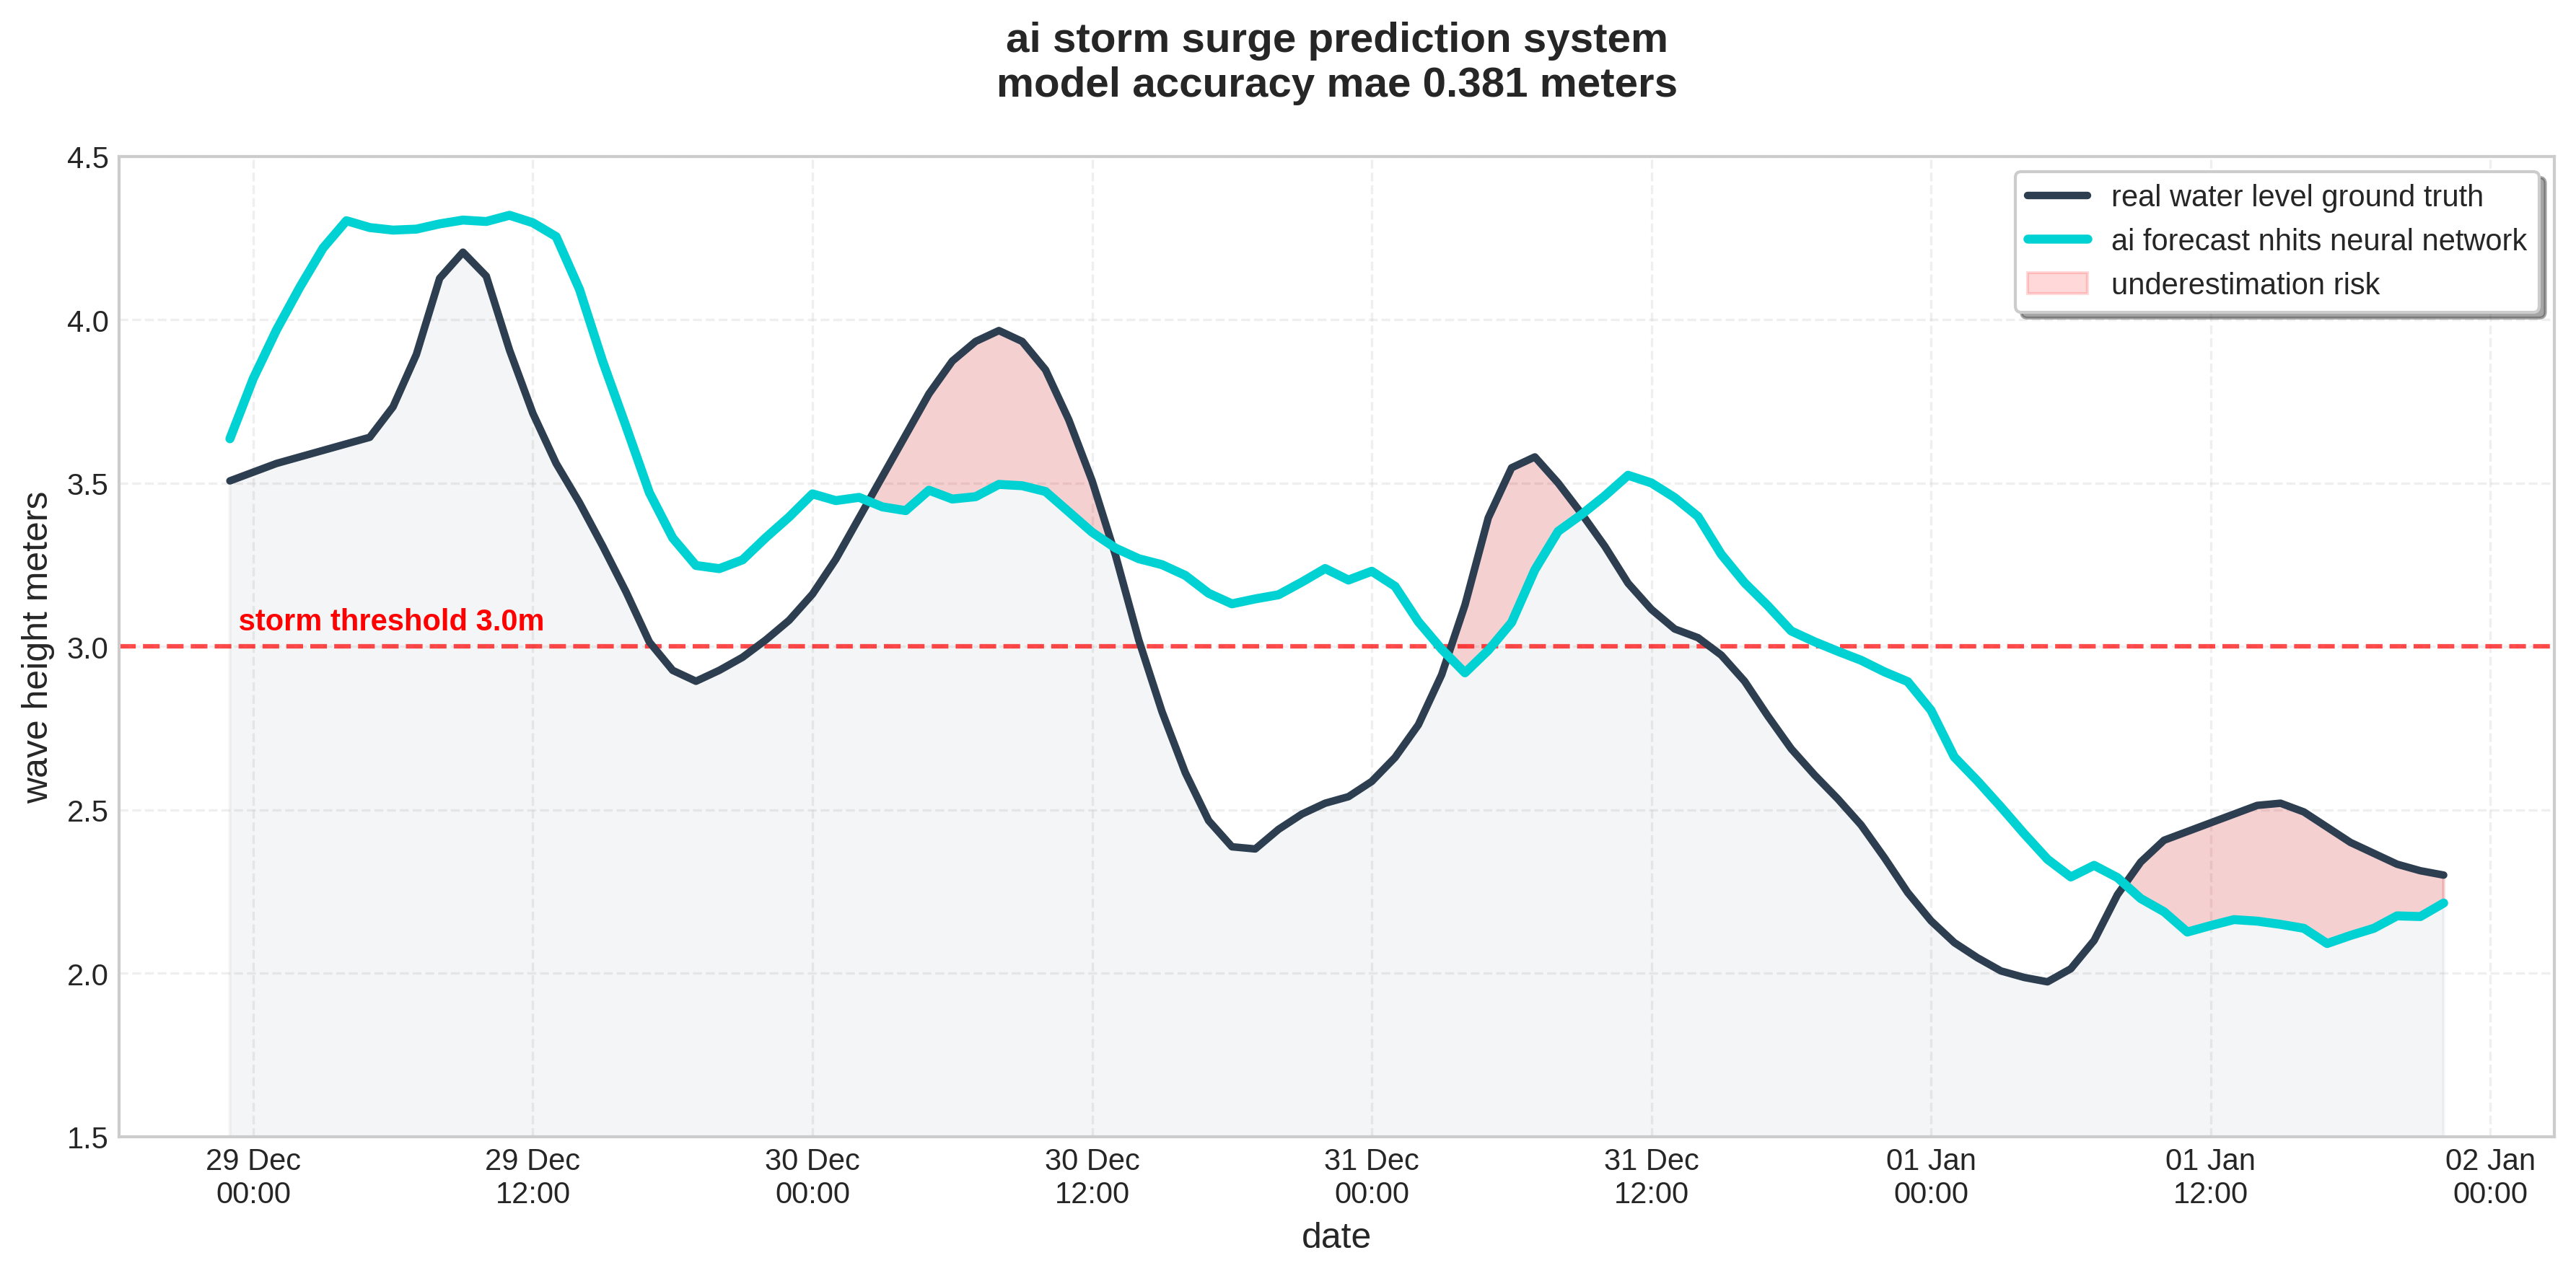

In [24]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from neuralforecast import NeuralForecast
from neuralforecast.models import NHITS
from neuralforecast.losses.pytorch import MAE

url_weather = "https://archive-api.open-meteo.com/v1/archive"
params_weather = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["pressure_msl", "wind_speed_10m"]
}
resp_w = requests.get(url_weather, params=params_weather).json()
df_weather = pd.DataFrame({
    'ds': pd.to_datetime(resp_w['hourly']['time']),
    'pressure': resp_w['hourly']['pressure_msl'],
    'wind_speed': resp_w['hourly']['wind_speed_10m']
})

url_marine = "https://marine-api.open-meteo.com/v1/marine"
params_marine = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["wave_height"]
}
resp_m = requests.get(url_marine, params=params_marine).json()
df_marine = pd.DataFrame({
    'ds': pd.to_datetime(resp_m['hourly']['time']),
    'y': resp_m['hourly']['wave_height']
})

df = pd.merge(df_weather, df_marine, on="ds")
df['unique_id'] = 'northsea_point1'

df['y'] = df['y'].rolling(window=3, center=True).mean()
df = df.dropna()

horizon = 96
y_train = df[:-horizon]
y_test = df[-horizon:]

models = [
    NHITS(h=horizon,
          input_size=48,
          loss=MAE(),
          futr_exog_list=['pressure', 'wind_speed'],
          max_steps=2000,
          scaler_type='robust',
          random_seed=42,
          alias='nhits_smooth')
]

nf = NeuralForecast(models=models, freq='H')
nf.fit(df=y_train)

future_exog = y_test[['unique_id', 'ds', 'pressure', 'wind_speed']]
y_hat = nf.predict(futr_df=future_exog)
plot_data = pd.merge(y_test, y_hat, on=['ds', 'unique_id'], how='left')
mae_smooth = abs(plot_data['y'] - plot_data['nhits_smooth']).mean()

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

ax.axhline(y=3.0, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax.text(plot_data['ds'].iloc[0], 3.05, ' storm threshold 3.0m', color='red', fontsize=10, fontweight='bold')

ax.plot(plot_data['ds'], plot_data['y'], label='real water level ground truth',
        color='#2c3e50', linewidth=2.5, zorder=2)
ax.fill_between(plot_data['ds'], 0, plot_data['y'], color='#2c3e50', alpha=0.05)

ax.plot(plot_data['ds'], plot_data['nhits_smooth'], label='ai forecast nhits neural network',
        color='#00d2d3', linewidth=3, zorder=3)

ax.fill_between(plot_data['ds'], plot_data['y'], plot_data['nhits_smooth'],
                where=(plot_data['y'] > plot_data['nhits_smooth']),
                interpolate=True, color='red', alpha=0.15, label='underestimation risk')

ax.set_title(f'ai storm surge prediction system\nmodel accuracy mae {mae_smooth:.3f} meters',
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('wave height meters', fontsize=12)
ax.set_xlabel('date', fontsize=12)
ax.legend(loc='upper right', frameon=True, fontsize=10, shadow=True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b\n%H:%M'))
plt.ylim(1.5, 4.5)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

creating compact chart with risk areas
chart saved as file compact_risk_chart.png


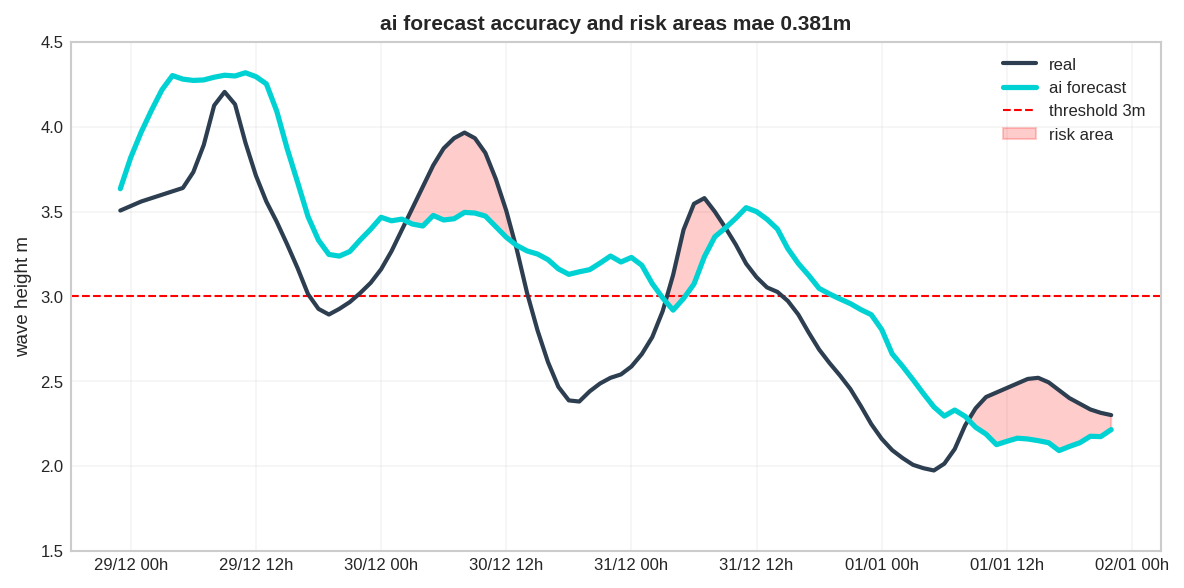

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(8, 4), dpi=150)

ax.plot(plot_data['ds'], plot_data['y'], label='real', color='#2c3e50', linewidth=2, zorder=2)
ax.plot(plot_data['ds'], plot_data['nhits_smooth'], label='ai forecast', color='#00d2d3', linewidth=2.5, zorder=3)

ax.axhline(y=3.0, color='red', linestyle='--', linewidth=1, label='threshold 3m', zorder=1)

ax.fill_between(plot_data['ds'], plot_data['y'], plot_data['nhits_smooth'],
                where=(plot_data['y'] > plot_data['nhits_smooth']),
                interpolate=True, color='red', alpha=0.2, label='risk area', zorder=1)

ax.set_title(f'ai forecast accuracy and risk areas mae {mae_smooth:.3f}m', fontsize=10, fontweight='bold')
ax.set_ylabel('wave height m', fontsize=9)
ax.legend(loc='upper right', fontsize=8)
ax.grid(True, alpha=0.2)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %Hh'))
plt.xticks(rotation=0, fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(1.5, 4.5)
plt.tight_layout(pad=1.0)
filename = 'compact_risk_chart.png'
plt.savefig(filename, bbox_inches='tight')
print(f"chart saved as file {filename}")
plt.show()